In [1]:
import yfinance as yf
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [2]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"
}

response = requests.get(url, headers=headers)
html_data = response.text

soup = BeautifulSoup(html_data, "html.parser")

tables = soup.find_all("table")

for table in tables:
    if "Tesla Quarterly Revenue" in table.text:
        revenue_table = table
        break

tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in revenue_table.tbody.find_all("tr"):
    cols = row.find_all("td")
    if cols:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace("$", "").replace(",", "")
        if revenue:  # 排除空值
            tesla_revenue = pd.concat(
                [tesla_revenue, pd.DataFrame([[date, revenue]], columns=["Date", "Revenue"])],
                ignore_index=True
            )

tesla_revenue.tail()

,Date,Revenue
57,2010-09-30,31
58,2010-06-30,28
59,2010-03-31,21
60,2009-09-30,46
61,2009-06-30,27


In [3]:
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [4]:
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"
}

response = requests.get(url, headers=headers)
html_data = response.text

soup = BeautifulSoup(html_data, "html.parser")
tables = soup.find_all("table")

for table in tables:
    if "GameStop Quarterly Revenue" in table.text:
        revenue_table = table
        break

gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in revenue_table.tbody.find_all("tr"):
    cols = row.find_all("td")
    if cols:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace("$", "").replace(",", "")
        if revenue:
            gme_revenue = pd.concat(
                [gme_revenue, pd.DataFrame([[date, revenue]], columns=["Date", "Revenue"])],
                ignore_index=True
            )

gme_revenue.tail()

,Date,Revenue
60,2010-01-31,3524
61,2009-10-31,1835
62,2009-07-31,1739
63,2009-04-30,1981
64,2009-01-31,3492


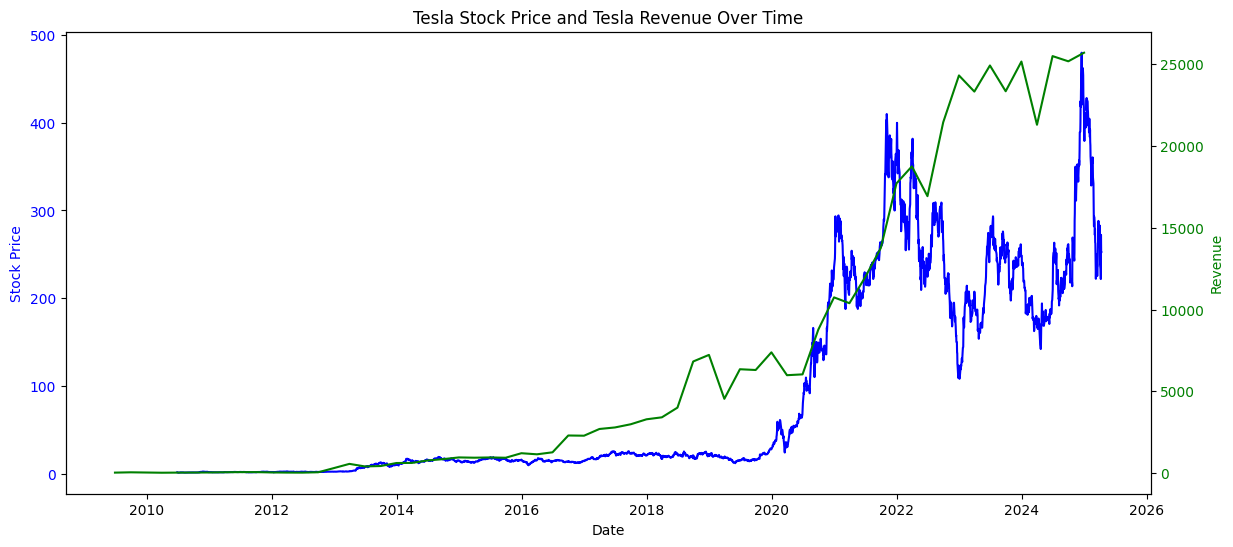

In [5]:
def make_graph(stock_data, revenue_data, stock, revenue):
    fig, ax1 = plt.subplots(figsize=(14, 6))

    stock_data["Date"] = pd.to_datetime(stock_data["Date"]).dt.tz_localize(None)
    revenue_data["Date"] = pd.to_datetime(revenue_data["Date"])

    ax1.plot(stock_data['Date'], stock_data['Close'], label="Stock Price", color='blue')
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Stock Price", color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    ax2 = ax1.twinx()
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'].astype(float), label="Revenue", color='green')
    ax2.set_ylabel("Revenue", color='green')
    ax2.tick_params(axis='y', labelcolor='green')

    plt.title(f"{stock} Stock Price and {revenue} Revenue Over Time")
    plt.show()

make_graph(tesla_data, tesla_revenue, 'Tesla', 'Tesla')

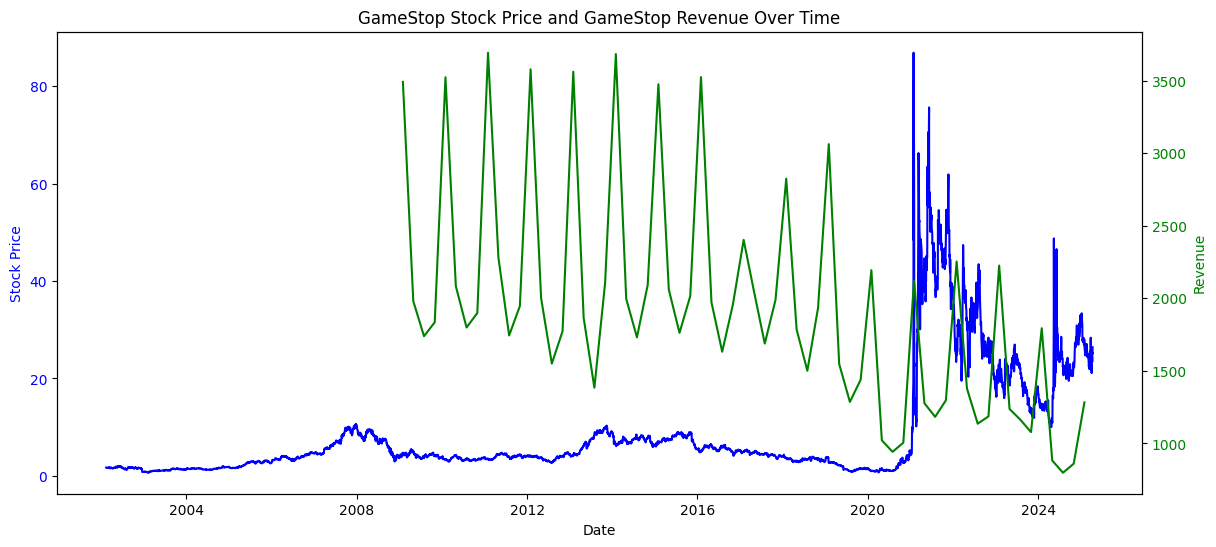

In [6]:
make_graph(gme_data, gme_revenue, 'GameStop', 'GameStop')